Converting 6 data sets into merged dataset

Merge All the data

In [1]:
import pandas as pd
import ast
import os
import re

#list of file name
path="DATA SET\\"
file_names=[ "bangalore_cars.xlsx","chennai_cars.xlsx","delhi_cars.xlsx","hyderabad_cars.xlsx","jaipur_cars.xlsx",
           "kolkata_cars.xlsx"]

dfs=[] # empty list

for file in file_names:
    df = pd.read_excel(f"{path}{file}")
    state = file.split("_")[0]
    df['state'] = state

    dfs.append(df)

merged_df=pd.concat(dfs, ignore_index=True)

print(" Files merged successfully")

 Files merged successfully


In [2]:
merged_df

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,state
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,bangalore
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,bangalore
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,bangalore
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,bangalore
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,bangalore
...,...,...,...,...,...,...
8364,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,kolkata
8365,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,kolkata
8366,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,kolkata
8367,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,kolkata


In [3]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   new_car_detail    8369 non-null   object
 1   new_car_overview  8369 non-null   object
 2   new_car_feature   8369 non-null   object
 3   new_car_specs     8369 non-null   object
 4   car_links         8369 non-null   object
 5   state             8369 non-null   object
dtypes: object(6)
memory usage: 392.4+ KB


Converting Unstructured Format of Data to a Structured Format 

Function Extract the Columns

In [4]:
#converting string representations into dictionaries
def convert_to_dic(row):
    try:
        a = ast.literal_eval(row)
        return a
    except ValueError:
        return None
    
#consolidates a list of dictionaries into a single DataFrame
    
def first(cardata):
    df = {}
    for row in cardata:
        for key in row:
            if key not in df:
                df[key]=[]
            df[key].append(row[key])
    df = pd.DataFrame(df)
    return df

# Extracting the key and value
def top(cardata):#Extracts key-value pairs from the "top" section of each dictionary in cardata.
        def extract_key_value_pairs(b):
            flat_dict={}
            try:
                if "top" in b:
                    for item in b["top"]:
                        key= item.get("key")
                        value=item.get("value")
                
                        if key:
                            flat_dict[key]=value  # Use key as column name and value as entry

            except:
                pass
            return flat_dict
        flattened_data = [extract_key_value_pairs(b) for b in cardata if b is not None]
        df = pd.DataFrame(flattened_data)
        return df

def data(cardata):
    def extract_key_value_pairs(b):
        flat_dict = {}
        try:
            # Proceed only if 'data' exists in the dictionary
            if b is not None and 'data' in b:
                for section in b['data']:
                    if 'list' in section:
                        for item in section['list']:
                            key = item.get('key')  # Using .get to avoid KeyError
                            value = item.get('value')
                            if key and value:  # Ensure both key and value exist
                                flat_dict[key] = value
                                
        except Exception as e:
            # Log or handle exception if needed
            print(f"Error processing row: {e}")
        return flat_dict

    # Filter out None entries
    flattened_data = [extract_key_value_pairs(b) for b in cardata if b is not None]
    df = pd.DataFrame(flattened_data)
    return df

Extract the Columns

In [5]:
#car_columns contains columns with nested data
car_columns=['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']


#Converts all string representations in the specified columns to dictionaries using the convert_to_dic function.
for columns in car_columns:
    merged_df[columns] = merged_df[columns].apply(convert_to_dic)

finaldf=pd.DataFrame()

c=pd.DataFrame()

for i in car_columns:
    d = first(merged_df[i]) #Extracts key-value pairs into a DataFrame from the dictionaries.

    if d is None:
        continue
    columns = d.columns

    if "top" in columns:
        d = top(merged_df[i])

    if "data" in columns:
        c = data(merged_df[i])
    #Processes columns containing "top" or "data" keys, respectively, extracting and flattening them into structured data.

    finaldf=pd.concat([finaldf,d], axis=1, ignore_index=False)

    if not c.empty:
        finaldf=pd.concat([finaldf,c], axis=1, ignore_index=False)

finaldf["city"]=merged_df["state"]
finaldf["car_links"]=merged_df["car_links"]#Appends contextual information (state as city and car_links) to the final DataFrame.

In [6]:
pd.set_option('display.max_columns', None)
finaldf

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText,Registration Year,Insurance Validity,Fuel Type,Seats,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture,Mileage,Engine,Max Power,Torque,Seats,Wheel Size,Color,Engine Type,Displacement,Max Power,Max Torque,No of Cylinder,Values per Cylinder,Value Configuration,Fuel Suppy System,BoreX Stroke,Compression Ratio,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seating Capacity,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Alloy Wheel Size,Ground Clearance Unladen,city,car_links
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,2015,Third Party insurance,Petrol,5 Seats,"1,20,000 Kms",KA51,Third Owner,998 cc,Manual,2015.0,23.1 kmpl,998 CC,67.04bhp,90Nm,5,NaN,White,K10B Engine,998,67.04bhp@6000rpm,90Nm@3500rpm,3.0,4.0,DOHC,MPFi,73 X 82 mm,11.0:1,No,No,3715mm,1635mm,1565mm,2425mm,1420mm,1410mm,835kg,1250kg,5 Speed,FWD,5,Power,4.7 metres,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5,235-litres,NaN,NaN,bangalore,https://www.cardekho.com/used-car-details/used...
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,Feb 2018,Comprehensive,Petrol,5 Seats,"32,706 Kms",KA05,Second Owner,1497 cc,Manual,2018.0,17 kmpl,1497 CC,121.31bhp,150Nm,5,16,White,Ti-VCT Petrol Engine,1497,121.31bhp@6500rpm,150Nm@4500rpm,3.0,4.0,DOHC,Direct Injection,79 X 76.5 mm,11.0:1,No,No,3998mm,1765mm,1647mm,2519mm,NaN,NaN,1242Kg,1660Kg,5 Speed,FWD,5,Power,5.3 metres,Ventilated Disc,Drum,NaN,NaN,"Tubeless,Radial",4,352-litres,16,NaN,bangalore,https://www.cardekho.com/buy-used-car-details/...
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,₹ 5.85 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,Sept 2018,Comprehensive,Petrol,5 Seats,"11,949 Kms",KA03,First Owner,1199 cc,Manual,2018.0,23.84 kmpl,1199 CC,84bhp,114Nm,5,14,Red,Revotron Engine,1199,84bhp@6000rpm,114Nm@3500rpm,3.0,4.0,DOHC,MPFi,77 X 85.8 mm,10.8:1,No,No,3746mm,1647mm,1535mm,2400mm,1400mm,1420mm,1012kg,NaN,5 Speed,FWD,5,Power,4.9 meters,Disc,Drum,150 kmph,14.3 Seconds,Tubeless,5,242-litres,14,NaN,bangalore,https://www.cardekho.com/used-car-details/used...
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,₹ 4.62 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,Dec 2014,Comprehensive,Petrol,5 Seats,"17,794 Kms",KA53,First Owner,1197 cc,Manual,2014.0,19.1 kmpl,1197 CC,81.86bhp,113.75Nm,5,14,Others,Kappa VTVT Petrol Engine,1197,81.86bhp@6000rpm,113.75Nm@4000rpm,4.0,4.0,DOHC,Direct Injection,NaN,NaN,No,No,3995mm,1660mm,1520mm,2425mm,1479mm,1493mm,1180,NaN,5 Speed,FWD,5,Power,4.7 metres,Disc,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",4,407-litres,14,NaN,bangalore,https://www.cardekho.com/buy-used-car-details/...
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,₹ 7.90 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,2015,Third Party insurance,Diesel,5 Seats,"60,000 Kms",KA04,First Owner,1248 cc,Manual,2015.0,23.65 kmpl,1248 CC,88.5bhp,200Nm,5,16,Gray,DDiS 200 Diesel Engine,1248,88.5bhp@4000rpm,200Nm@1750rpm,4.0,4.0,DOHC,NaN,69.6 x 82 mm,NaN,Yes,No,4300mm,1785mm,1595mm,2600mm,NaN,NaN,1230Kg,1670kg,5 Speed,FWD,5,Power,5.2 meters,Ventilated Disc,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial",5,353-litres,16,NaN,bangalore,https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [7]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 70 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   it                        8369 non-null   int64  
 1   ft                        8369 non-null   object 
 2   bt                        8369 non-null   object 
 3   km                        8369 non-null   object 
 4   transmission              8369 non-null   object 
 5   ownerNo                   8369 non-null   int64  
 6   owner                     8369 non-null   object 
 7   oem                       8369 non-null   object 
 8   model                     8369 non-null   object 
 9   modelYear                 8369 non-null   int64  
 10  centralVariantId          8369 non-null   int64  
 11  variantName               8369 non-null   object 
 12  price                     8369 non-null   object 
 13  priceActual               8369 non-null   object 
 14  priceSav

In [8]:
finaldf.shape

(8369, 70)

In [9]:
print(finaldf.columns)

Index(['it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner', 'oem',
       'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'priceSaving', 'priceFixedText', 'trendingText',
       'Registration Year', 'Insurance Validity', 'Fuel Type', 'Seats',
       'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement', 'Transmission',
       'Year of Manufacture', 'Mileage', 'Engine', 'Max Power', 'Torque',
       'Seats', 'Wheel Size', 'Color', 'Engine Type', 'Displacement',
       'Max Power', 'Max Torque', 'No of Cylinder', 'Values per Cylinder',
       'Value Configuration', 'Fuel Suppy System', 'BoreX Stroke',
       'Compression Ratio', 'Turbo Charger', 'Super Charger', 'Length',
       'Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread',
       'Kerb Weight', 'Gross Weight', 'Gear Box', 'Drive Type',
       'Seating Capacity', 'Steering Type', 'Turning Radius',
       'Front Brake Type', 'Rear Brake Type', 'Top Speed', 'Acceleration',
  

In [10]:
# Import necessary libraries
import re
import numpy as np
import pandas as pd

# Create a copy of the final dataframe
df = finaldf.copy()

df_columns = df.columns
for i,k in df.isna().sum().items():
    if k >= 300:
        df.drop(i, axis=1, inplace=True)
df_columns_1 = df.columns
print(len(df_columns),len(df_columns_1))

df_1 = pd.DataFrame(df['Max Power'])
df_1.columns = ['Max Power (bhp)', 'Max Power (bhp@rpm)']
df = df.drop(columns=["Max Power"])
df['Max Power'] = df_1['Max Power (bhp)']


conversion_factor = 1.39
df['Mileage'] = df['Mileage'].str.replace(' kmpl', '') 
df['Mileage'] = df['Mileage'].apply(lambda x: float(x.replace(' km/kg', '')) * conversion_factor if 'km/kg' in str(x) else float(x))
df['Mileage'] = df['Mileage'].astype(float)

def extract_integer(value):
    result = re.findall(r'\d+', str(value))
    return int(result[0]) if result else None


df['km'] = df['km'].str.replace(',', '').astype(int)

df = df.drop(["priceActual","priceSaving","Year of Manufacture","Seats","Fuel Type","trendingText","owner","Ownership","Kms Driven","transmission",'Engine Displacement','Displacement','Max Torque',"car_links",'centralVariantId','No Door Numbers'], axis=1)

df['Insurance Validity'] = df['Insurance Validity'].replace({
    'Third Party insurance': 'Third Party',
    '1': 'Not Available',
    '2': 'Not Available',
})

df['Gear Box'] = df['Gear Box'].str.strip()
df['Gear Box'] = df['Gear Box'].replace({
    '5-Speed': '5 Speed', '5-Speed`': '5 Speed', '5-Speed ': '5 Speed',
    '5 speed': '5 Speed', '5-Speed ': '5 Speed',
    'Six Speed Manual': '6 Speed', 'Six Speed': '6 Speed', '6-Speed': '6 Speed',
    '6-Speed IVT': '6 Speed IVT', 'Six Speed Automatic Transmission': '6 Speed',
    '6Speed': '6 Speed', 'Six Speed  Gearbox': '6 Speed', '6-speed': '6 Speed',
    'Five Speed': '5 Speed', 'Five Speed Manual': '5 Speed',
    'Five Speed Manual Transmission': '5 Speed', 'Five Speed Manual Transmission Gearbox': '5 Speed',
    '7-Speed': '7 Speed', '7-speed': '7 Speed',
    'Seven Speed': '7 Speed', '7-speed PDK': '7 Speed',
    '7G-DCT': '7 Speed DCT', '7-Speed DCT': '7 Speed DCT',
    '8-Speed': '8 Speed', '8-speed': '8 Speed',
    '8Speed': '8 Speed', '8-Speed DCT': '8 Speed',
    '9-Speed': '9 Speed', '9-speed': '9 Speed',
    '10-speed': '10 Speed',
    'Fully Automatic': 'Automatic', 'Single-speed transmission': 'Single Speed',
    'Single speed reduction gear': 'Single Speed', 'Single Speed': 'Single Speed',
    'SPEEDSHIFT TCT 9G': '9 Speed', '9G-TRONIC': '9 Speed',
    '9G TRONIC': '9 Speed', '9G-TRONIC automatic': '9 Speed',
    'AGS': 'Automatic', 'IVT': 'IVT', 'E-CVT': 'CVT', 'eCVT': 'CVT',
    'AMG SPEEDSHIFT DCT 8G': '8 Speed DCT', 'AMG 7-SPEED DCT': '7 Speed DCT',
    '10 Speed': '10 Speed'
})

df['Engine'] = (df['Engine'].str.replace(' CC', '', regex=False).astype(float).fillna(0).astype(int))
     # Handle NaN
   # Convert to int

df['Max Power'] = df['Max Power'].apply(extract_integer)

df['Torque'] = df['Torque'].apply(extract_integer)

df['Length'] = df['Length'].apply(extract_integer)

df['Width'] = df['Width'].apply(extract_integer)

df['Wheel Base'] = df['Wheel Base'].apply(extract_integer)

df['Height'] = df['Height'].apply(extract_integer)

df['Kerb Weight'] = df['Kerb Weight'].apply(extract_integer)
df['Kerb Weight'] = df['Kerb Weight'].fillna(df['Kerb Weight'].mean())

df['Registration Year'] = df['Registration Year'].apply(extract_integer)

df['Tyre Type'] = df['Tyre Type'].str.strip()
df['Tyre Type'] = df['Tyre Type'].replace({
    'Tubeless, Radial': 'Tubeless Radial', 'Tubeless,Radial': 'Tubeless Radial', 
    'Radial, Tubless': 'Tubeless Radial', 'Radial, Tubeless': 'Tubeless Radial',
    'Tubeless Radial Tyres': 'Tubeless Radial', 'Tubless, Radial': 'Tubeless Radial',
    'Radial,Tubeless': 'Tubeless Radial', 'Tubeless,Radials': 'Tubeless Radial',
    'Tubeless, Runflat': 'Tubeless Runflat', 'Tubeless. Runflat': 'Tubeless Runflat',
    'Runflat Tyres': 'Runflat', 'Runflat Tyre': 'Runflat', 'Runflat,Radial': 'Runflat Radial',
    'Run-Flat': 'Runflat', 'Radial with tube': 'Radial Tube',
    'Radial Tubeless': 'Tubeless Radial', 'Tubeless Radials Tyre': 'Tubeless Radial',
    'Tubeless ': 'Tubeless', 'Radial ': 'Radial', 
    'tubeless tyre': 'Tubeless', 'Tubeless Tyre': 'Tubeless',
    'Tubeless Tyres': 'Tubeless', 'Radial Tyres': 'Radial',
    'Tubeless Tyres, Radial': 'Tubeless Radial', 'Tubeless,Radial ': 'Tubeless Radial',
    'Tubeless Tyres Mud Terrain': 'Tubeless Mud Terrain',
    'Tubeless Tyres All Terrain': 'Tubeless All Terrain',
    'Tubeless Radials': 'Tubeless Radial','Tubeless,Runflat': 'Tubeless Runflat',
    'Tubless,Radial': 'Tubeless Radial', 'Radial Tube': 'Radial', 'Tubeless, Radials': 'Tubeless Radial'
    
})

def clean_price(price):
    price = price.replace(',', '').replace('₹', '').strip()
    try:
        if 'Lakh' in price:
            price = float(price.replace('Lakh', '').strip()) * 100000
        elif 'Crore' in price:
            price = float(price.replace('Crore', '').strip()) * 10000000
        else:
            price = float(price)
    except ValueError:
        return None
    return price
df['price'] = df['price'].apply(clean_price)
df['price'] = df['price'].astype(int)


categorical_columns = [
 "ft","bt","ownerNo","oem","model","modelYear",
 "Registration Year","Insurance Validity","Transmission",
 "Engine","Color","Engine Type","No of Cylinder", "Values per Cylinder",
 "Gear Box","Seating Capacity","Steering Type","Front Brake Type",
 "Rear Brake Type","Tyre Type","city"]

Numerical_columns = ["it","km","Mileage","Torque","Length","Width","Height","Wheel Base","Kerb Weight","Max Power"]

for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

for col in Numerical_columns:
    df[col] = df[col].fillna(df[col].mean())

70 51


In [11]:
df.rename(
    columns={
        'ft':'Fuel_Type', 'km':'Kilometers_Driven',"Transmission":'Transmission_Type','ownerNo':'No_of_Owners',
        'oem':'Manufactured_By','model':'Car_Model' ,'modelYear':'Car_Produced_Year' ,'Price':'Car_Price',
        "Registration Year":'Registration_Year',"Seating Capacity":'No_of_Seats','Engine':'Engine_CC',
        'Mileage':'Mileage(kmpl)'
    },
    inplace=True  # Use inplace=True to modify the original DataFrame
)

In [12]:

Car_Produced_Year = df[df['Registration_Year'].isin(['sive', 'able', 'ance','arty'])]['Car_Produced_Year']
df.loc[df['Registration_Year'].isin(['sive', 'able', 'ance','arty']),'Registration_Year'] = Car_Produced_Year

In [13]:
df['Car_Age']=df['Car_Produced_Year'].apply(lambda x: 2024-x)

In [14]:
print(df.shape)
df.head()

(8369, 34)


,it,Fuel_Type,bt,Kilometers_Driven,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,variantName,price,Registration_Year,Insurance Validity,Transmission_Type,Mileage(kmpl),Engine_CC,Torque,Color,Engine Type,No of Cylinder,Values per Cylinder,Length,Width,Height,Wheel Base,Kerb Weight,Gear Box,No_of_Seats,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,city,Max Power,Car_Age
0,0,Petrol,Hatchback,120000,3,Maruti,Maruti Celerio,2015,VXI,400000,2015.0,Third Party,Manual,23.10,998,90.0,White,K10B Engine,3.0,4.0,3715.0,1635.0,1565.0,2425.0,835.0,5 Speed,5,Power,Ventilated Disc,Drum,Tubeless Radial,bangalore,67.0,9
1,0,Petrol,SUV,32706,2,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,811000,2018.0,Comprehensive,Manual,17.00,1497,150.0,White,Ti-VCT Petrol Engine,3.0,4.0,3998.0,1765.0,1647.0,2519.0,1242.0,5 Speed,5,Power,Ventilated Disc,Drum,Tubeless Radial,bangalore,121.0,6
2,0,Petrol,Hatchback,11949,1,Tata,Tata Tiago,2018,1.2 Revotron XZ,585000,2018.0,Comprehensive,Manual,23.84,1199,114.0,Red,Revotron Engine,3.0,4.0,3746.0,1647.0,1535.0,2400.0,1012.0,5 Speed,5,Power,Disc,Drum,Tubeless,bangalore,84.0,6
3,0,Petrol,Sedan,17794,1,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,462000,2014.0,Comprehensive,Manual,19.10,1197,113.0,Others,Kappa VTVT Petrol Engine,4.0,4.0,3995.0,1660.0,1520.0,2425.0,1180.0,5 Speed,5,Power,Disc,Drum,Tubeless Radial,bangalore,81.0,10
4,0,Diesel,SUV,60000,1,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,790000,2015.0,Third Party,Manual,23.65,1248,200.0,Gray,DDiS 200 Diesel Engine,4.0,4.0,4300.0,1785.0,1595.0,2600.0,1230.0,5 Speed,5,Power,Ventilated Disc,Solid Disc,Tubeless Radial,bangalore,88.0,9


In [15]:
df['Engine_CC'].unique()

array([ 998, 1497, 1199, 1197, 1248, 1956, 1198, 1462, 2179, 1950, 1396,
       1995, 1498, 4663, 1086, 1991, 1968, 1998, 2982, 1461, 1797,  796,
       1353, 2925, 2987, 2967,  999, 1341, 1496, 1582, 1798, 1120, 1969,
       1451,  814, 1999, 1591, 1397, 1368, 1598, 3198, 1196, 2993, 2755,
       2143, 2354, 1332, 2199, 1997, 1499, 2148, 2696, 1364, 2494, 1373,
       1299, 1061, 1493, 2497, 1495, 1590, 1896, 1330, 1781, 1390, 1194,
       2953, 1399, 1595,    0, 2496, 1984, 2694, 1298, 2362,  970, 2198,
       1599,  993, 2393, 1389, 1597, 2498, 2523, 1586,  995, 2499, 2998,
         72, 1589,  624, 1596,  799, 3597, 2184, 1405, 5000, 1422, 1047,
       2200, 2996, 1108, 2400, 1996, 1395, 1186, 1799, 2999, 1482,  793,
        936, 4134, 1796, 1172, 1468, 1193, 2477, 2997, 2995, 2487, 1794,
       3456, 2360, 3982, 2894, 3346, 3498, 2979, 1349, 2157, 1985, 2112,
       2446, 2359, 2609, 2956, 2231, 2835, 1150, 1343, 2981, 4395, 1817,
       3993, 1948, 4806, 2994, 1993, 1490, 2489])

In [16]:
df.loc[(df['Engine_CC'].isin(['0'])) | (df['Engine_CC'].isna())][['Manufactured_By', 'Car_Model']]


,Manufactured_By,Car_Model


In [17]:
print(df.columns)

Index(['it', 'Fuel_Type', 'bt', 'Kilometers_Driven', 'No_of_Owners',
       'Manufactured_By', 'Car_Model', 'Car_Produced_Year', 'variantName',
       'price', 'Registration_Year', 'Insurance Validity', 'Transmission_Type',
       'Mileage(kmpl)', 'Engine_CC', 'Torque', 'Color', 'Engine Type',
       'No of Cylinder', 'Values per Cylinder', 'Length', 'Width', 'Height',
       'Wheel Base', 'Kerb Weight', 'Gear Box', 'No_of_Seats', 'Steering Type',
       'Front Brake Type', 'Rear Brake Type', 'Tyre Type', 'city', 'Max Power',
       'Car_Age'],
      dtype='object')


In [18]:
columns_to_drop = [
    'it', 'bt', 'variantName', 'Insurance Validity', 'Torque', 'Color',
    'Engine Type', 'No of Cylinder', 'Values per Cylinder', 'Length',
    'Width', 'Height', 'Wheel Base', 'Kerb Weight', 'Gear Box',
    'Steering Type', 'Front Brake Type', 'Rear Brake Type', 'Tyre Type',
    'Max Power'
]
df.drop([col for col in columns_to_drop if col in df.columns], axis=1, inplace=True)

In [19]:
df['Registration_Year']=df['Registration_Year'].astype("int")
df['No_of_Seats']=df['No_of_Seats'].astype("int")
df['Mileage(kmpl)'] = df['Mileage(kmpl)'].astype(float).round(2)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          8369 non-null   object 
 1   Kilometers_Driven  8369 non-null   int64  
 2   No_of_Owners       8369 non-null   int64  
 3   Manufactured_By    8369 non-null   object 
 4   Car_Model          8369 non-null   object 
 5   Car_Produced_Year  8369 non-null   int64  
 6   price              8369 non-null   int64  
 7   Registration_Year  8369 non-null   int64  
 8   Transmission_Type  8369 non-null   object 
 9   Mileage(kmpl)      8369 non-null   float64
 10  Engine_CC          8369 non-null   int64  
 11  No_of_Seats        8369 non-null   int64  
 12  city               8369 non-null   object 
 13  Car_Age            8369 non-null   int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 915.5+ KB


In [21]:
df[df.duplicated]

,Fuel_Type,Kilometers_Driven,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,price,Registration_Year,Transmission_Type,Mileage(kmpl),Engine_CC,No_of_Seats,city,Car_Age
79,Petrol,60000,2,Maruti,Maruti Ritz,2014,420000,2014,Manual,18.50,1197,5,bangalore,10
114,Petrol,20000,1,Hyundai,Hyundai Venue,2019,1250000,2019,Automatic,18.15,998,5,bangalore,5
124,Petrol,80000,3,Hyundai,Hyundai i10,2009,249000,2009,Manual,20.36,1197,5,bangalore,15
183,Petrol,120000,3,Maruti,Maruti Celerio,2015,400000,2015,Manual,23.10,998,5,bangalore,9
197,Petrol,50000,1,Fiat,Fiat Linea,2009,375000,2009,Manual,16.00,1368,5,bangalore,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,Petrol,54000,1,Volkswagen,Volkswagen Vento,2017,650000,2017,Automatic,18.19,1197,5,kolkata,7
8264,Petrol,29000,1,Hyundai,Hyundai Venue,2021,950000,2021,Automatic,18.15,998,5,kolkata,3
8297,Petrol,20000,1,Kia,Kia Carens,2022,1099000,2022,Manual,19.31,1497,7,kolkata,2
8339,Petrol,10000,1,Maruti,Maruti Swift,2021,650000,2021,Manual,21.21,1197,5,kolkata,3


In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.shape

(8244, 14)

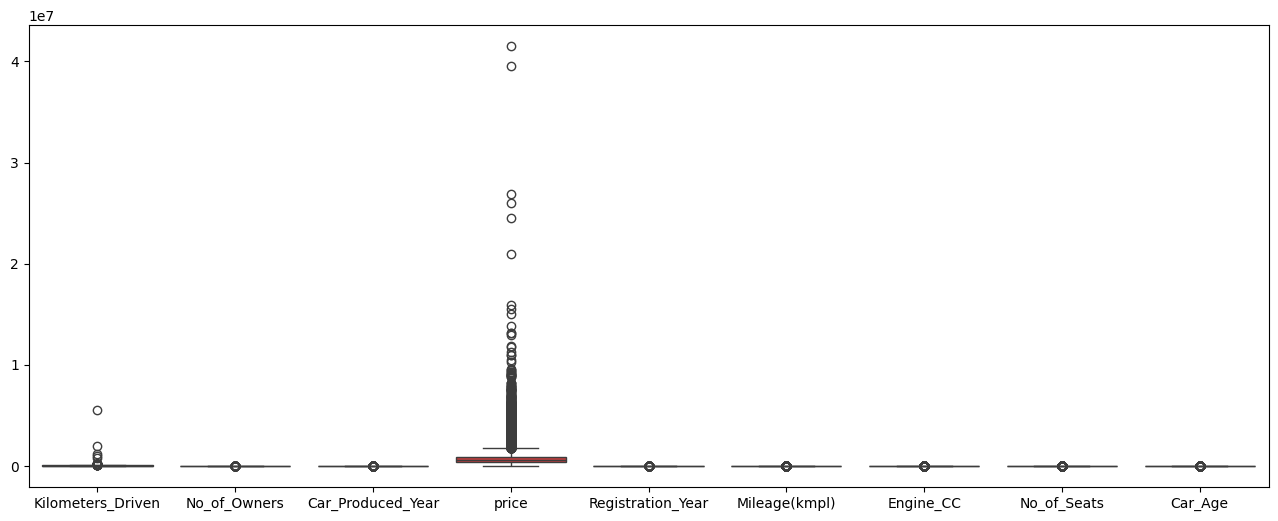

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast


plt.figure(figsize=(16,6))
sns.boxplot(data=df)
plt.show()

Kilometers_Driven


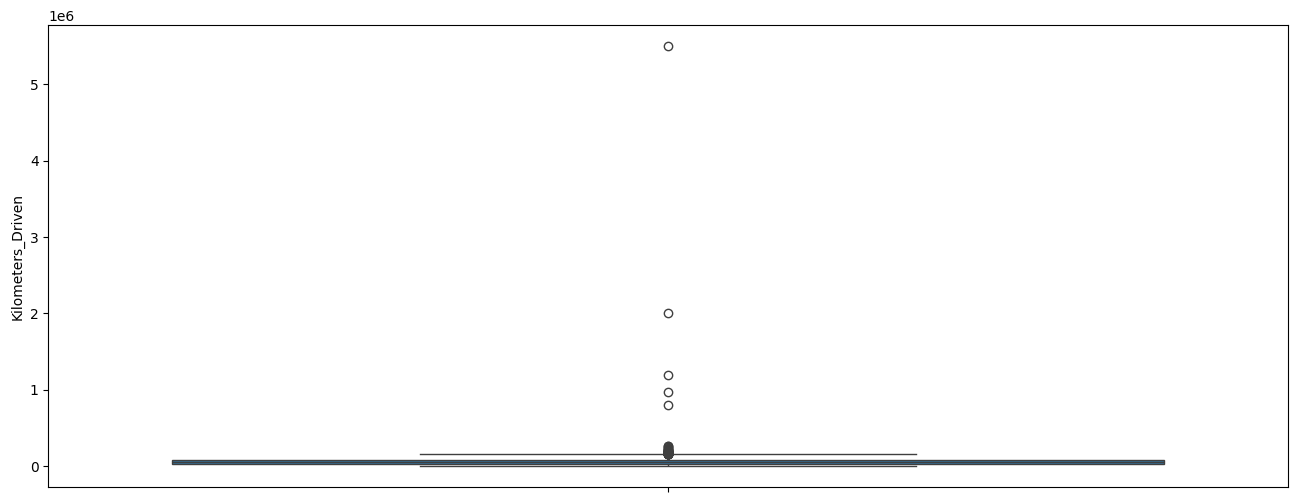

No_of_Owners


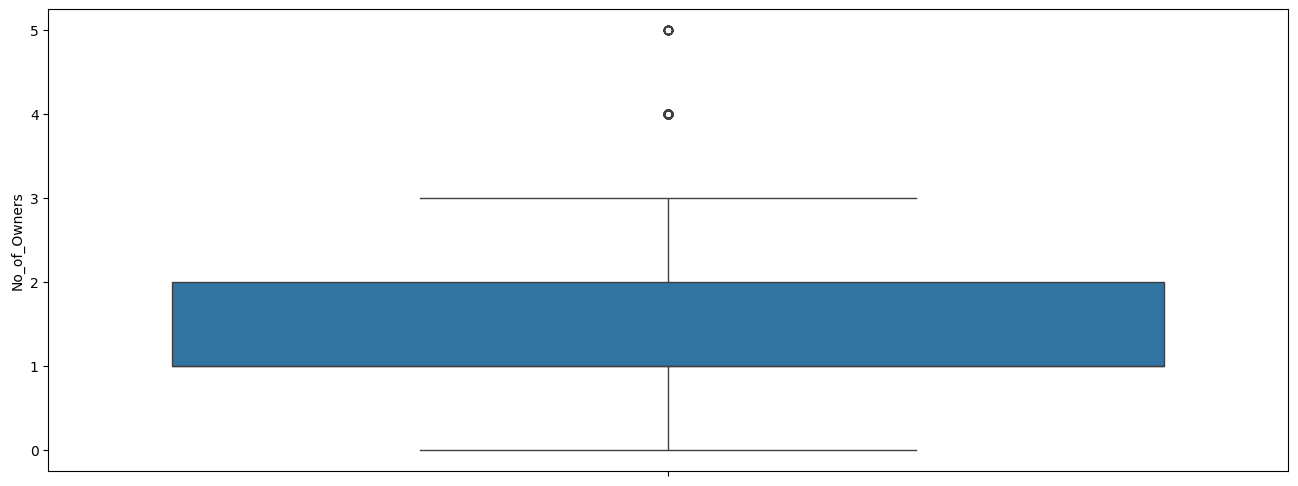

Car_Produced_Year


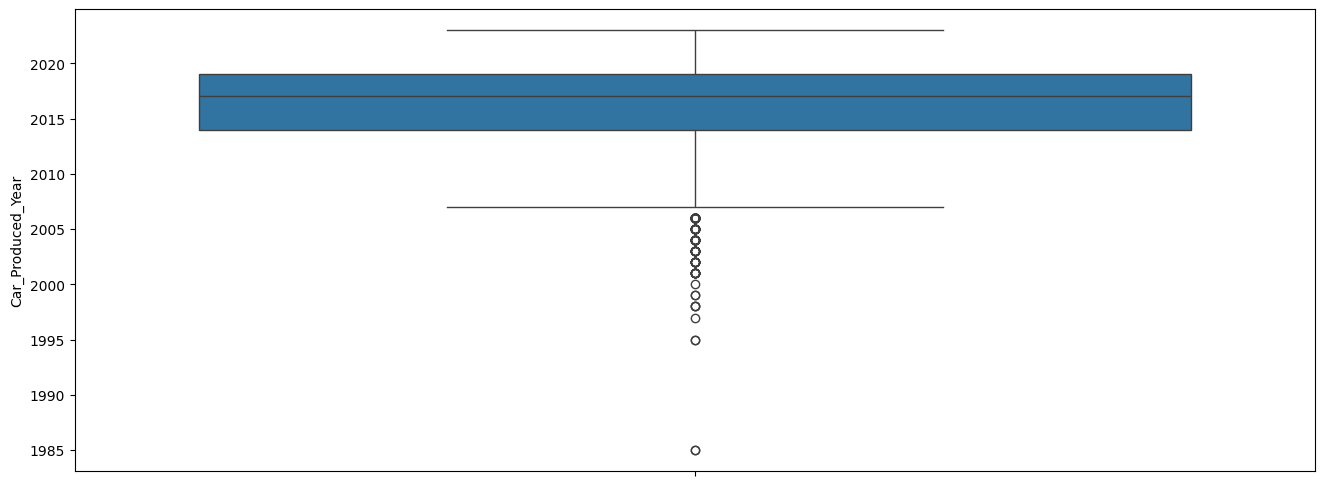

price


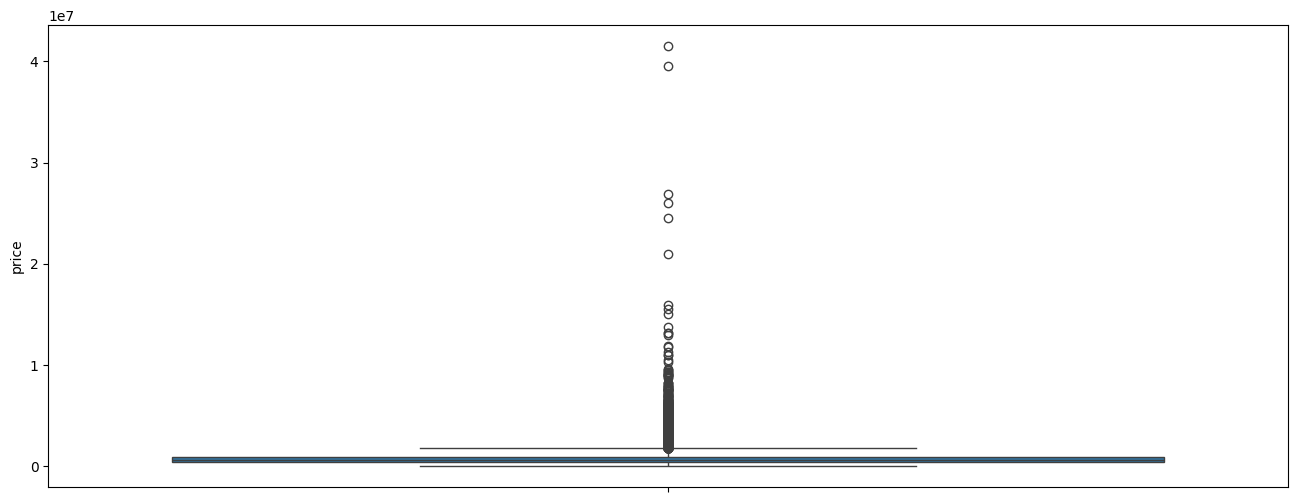

Registration_Year


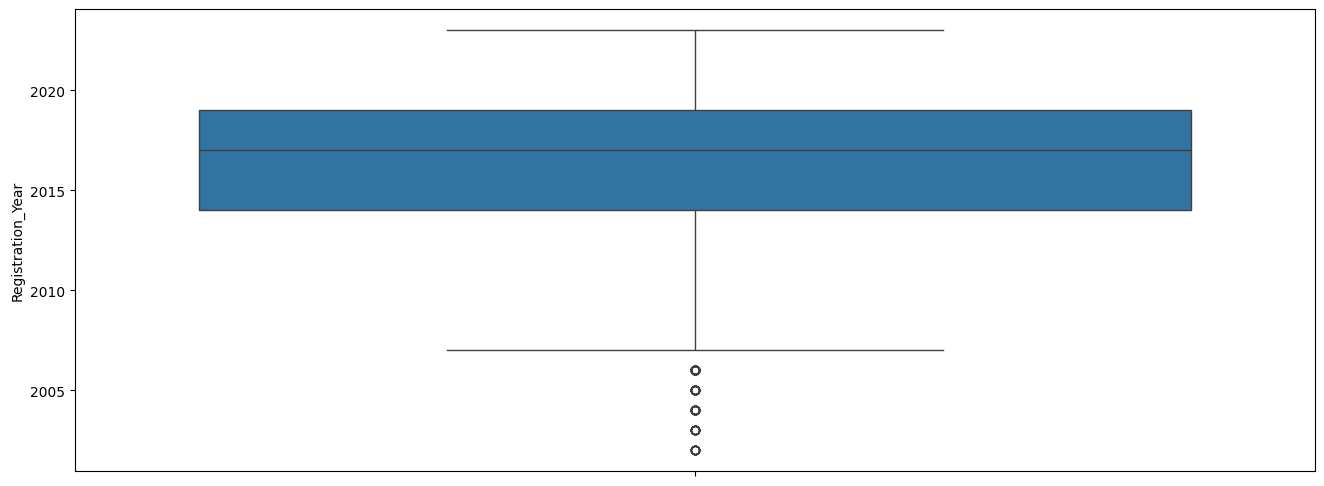

Mileage(kmpl)


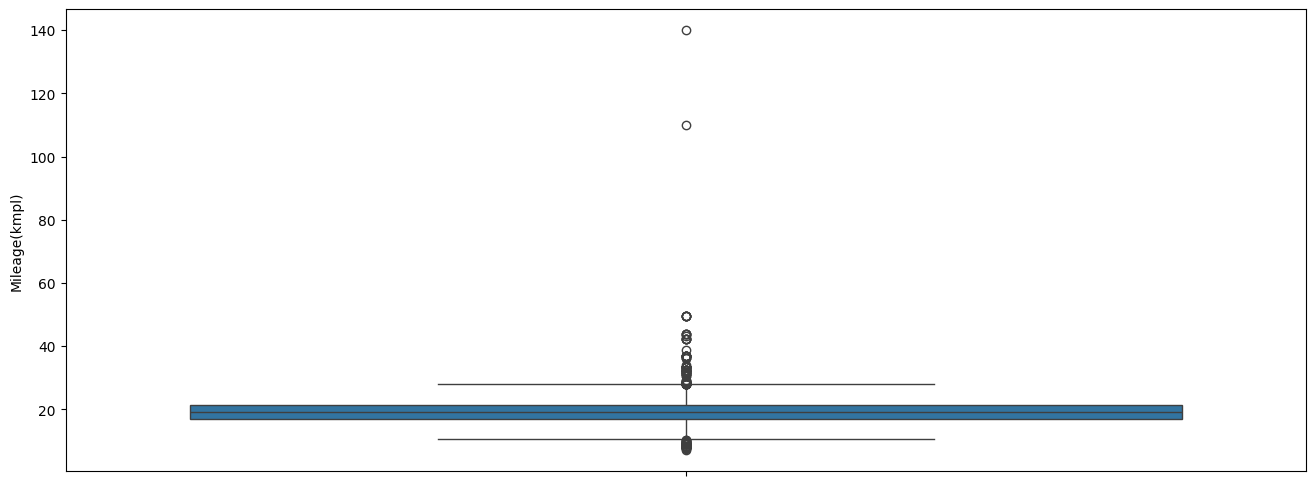

Engine_CC


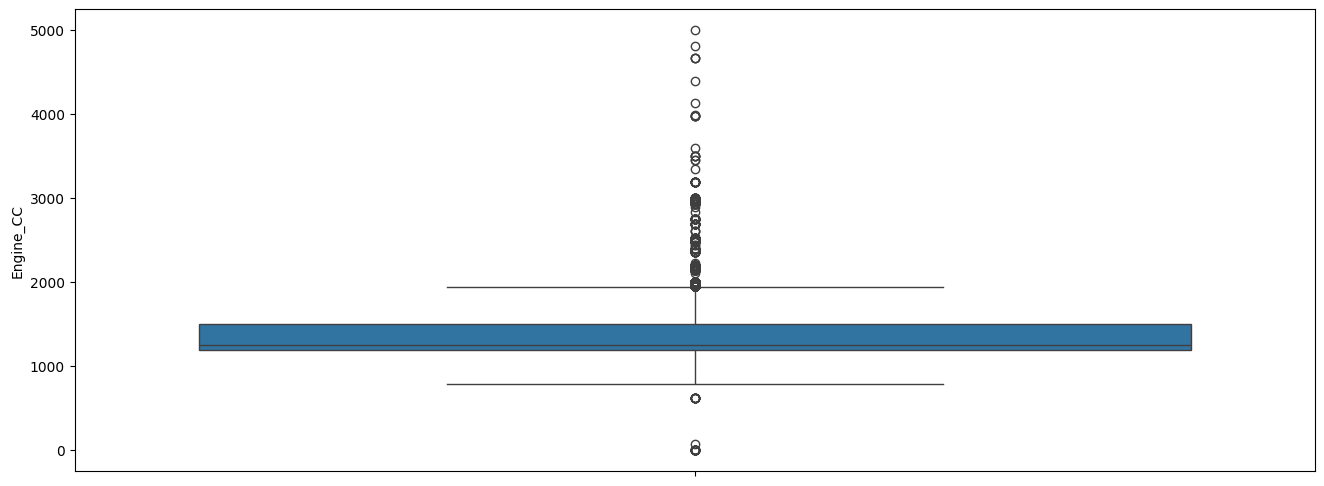

No_of_Seats


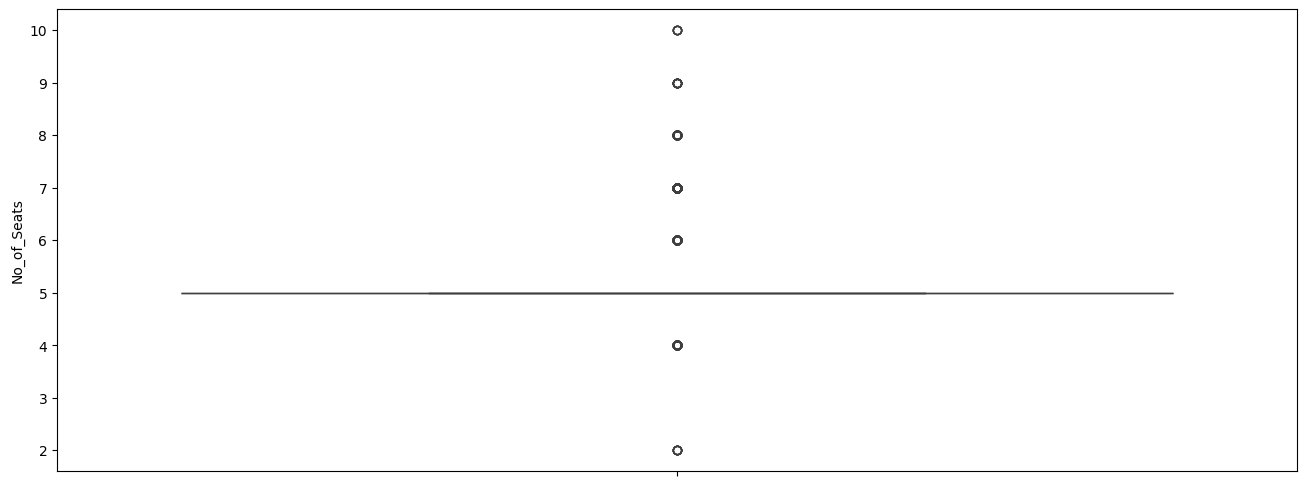

Car_Age


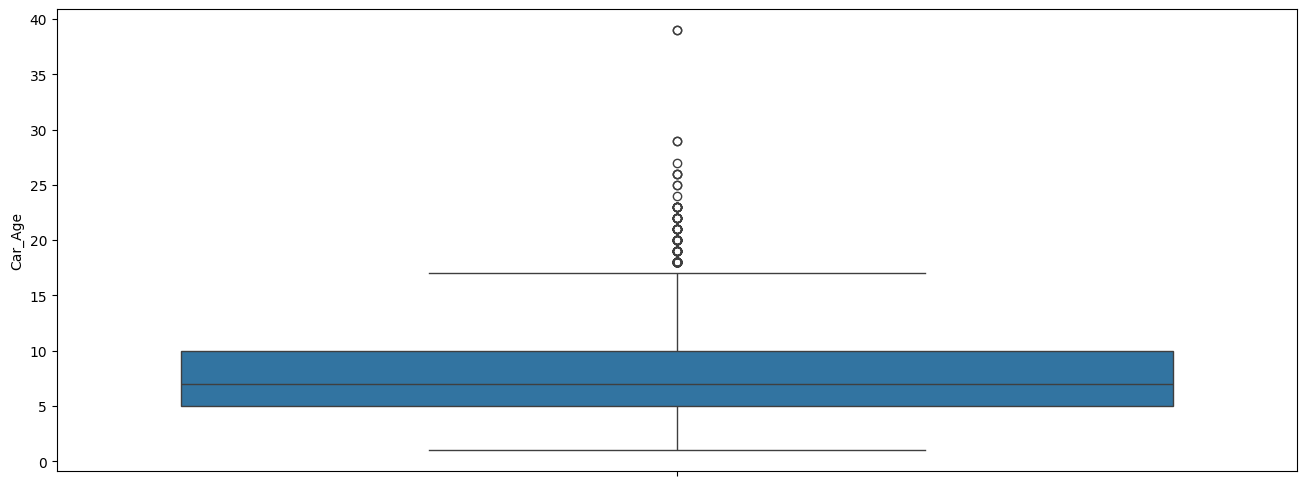

In [25]:
for i in df.columns:
    if df[i].dtype != 'object':
        print(i)
        plt.figure(figsize=(16,6))
        sns.boxplot(data=df[i])
        plt.show()

In [26]:
price = df[(df['Car_Produced_Year'] < 2009) & 
              (df['price'] > 1000000) & 
              (df['Manufactured_By'] != 'BMW')]
df.drop(price.index,inplace=True)

In [27]:
df.to_csv('Cleaned_Car_Dheko.csv', index = False)

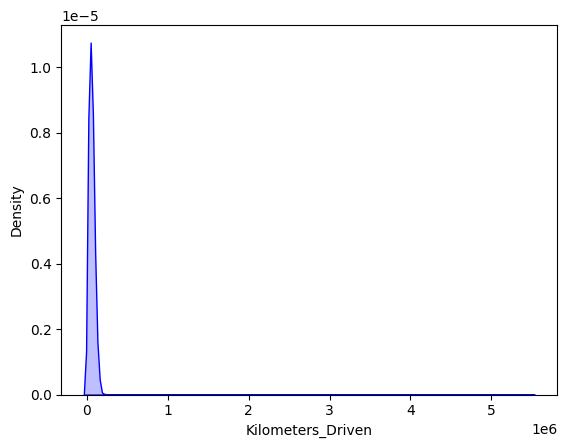

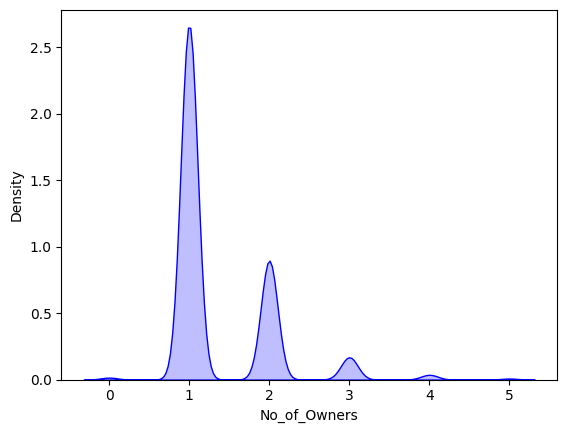

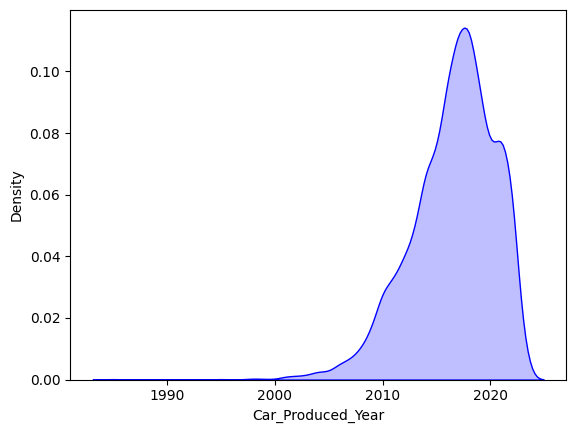

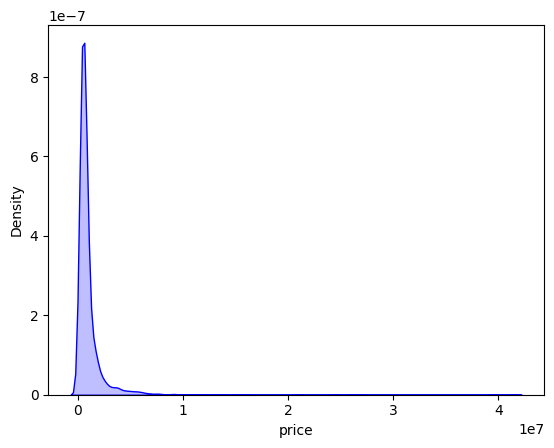

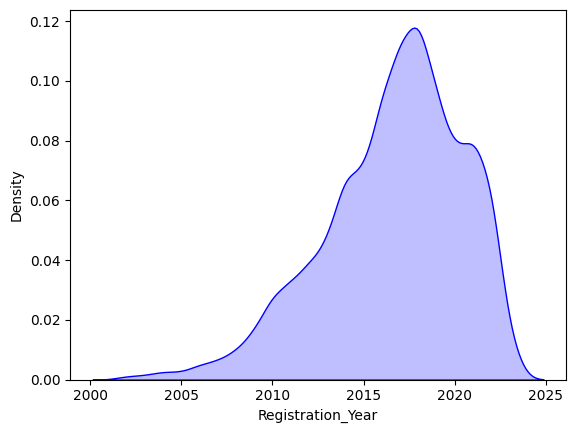

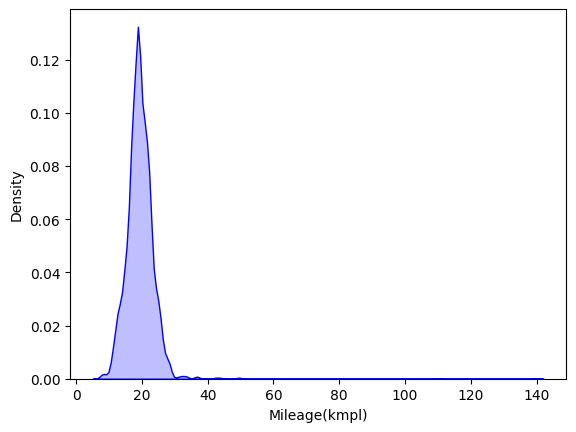

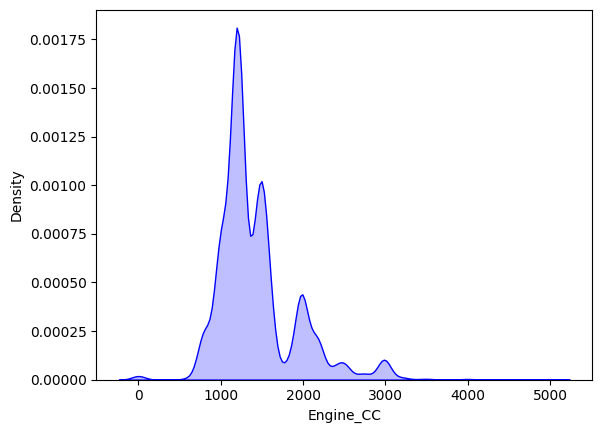

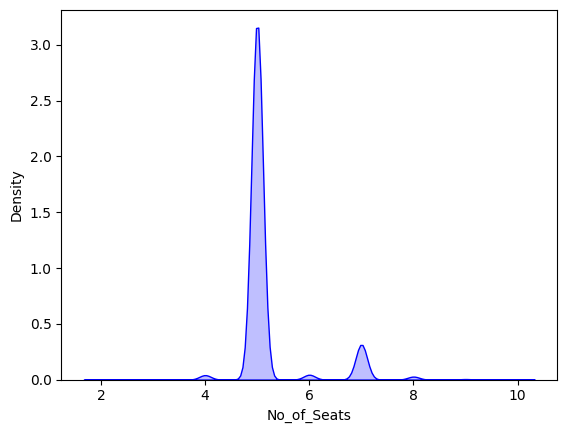

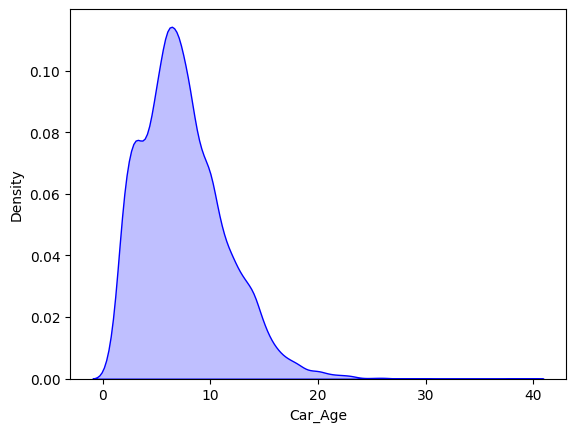

In [29]:
for i in df.columns:
    if df[i].dtype != 'object' :
        sns.kdeplot(data=df[i],fill=True,color="b")
        plt.show()

In [28]:
def inv_trans(x):
    if x!=0:
        return 1/x
    else:
        return 0

df['Kilometers_Driven'] = df['Kilometers_Driven'].apply(inv_trans)

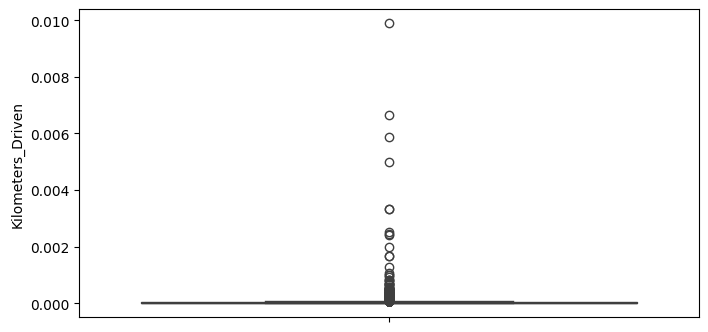

In [29]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df['Kilometers_Driven'])
plt.show()

In [36]:
continuous = df[['Kilometers_Driven','No_of_Owners','Car_Produced_Year','price','Registration_Year','No_of_Seats','Engine_CC','Mileage(kmpl)','Car_Age']]#numerical variables
categorical = df[['Fuel_Type','Transmission_Type','Manufactured_By','Car_Model','city']]

Outlier removal

In [37]:
# Ensure all relevant columns are numerical
numerical_cols_o = df.select_dtypes(include=['number']).columns

# Calculate Q1 and Q3 for numerical columns
Q1 = df[numerical_cols_o].quantile(0.05)
Q3 = df[numerical_cols_o].quantile(0.95)

# Calculate IQR for numerical columns
IQR = Q3 - Q1

# Remove outliers from numerical columns
car_df = df[~((df[numerical_cols_o] < (Q1 - 1.5 * IQR)) |(df[numerical_cols_o] > (Q3 + 1.5 * IQR))).any(axis=1)]

car_df.shape

(8091, 14)

In [38]:
df=car_df

Data Preprocessing

In [39]:
import sklearn
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

for i in df.columns:
    if df[i].dtype == 'object':
        col_name = i
        df[i] = enc.fit_transform(df[[i]])
        encode = df[i].sort_values().unique() # 0.0,1.0,2.0 - this is encoded value
        globals()[col_name] = {}
        decoded_data = enc.inverse_transform(df[[i]])
        decoded = sorted(np.unique(decoded_data)) # original value of dataframe - like decoded value
        globals()[i] = dict(zip(decoded, encode))

In [41]:
df.to_csv('Preprocessed_Car_Dheko.csv', index = False)

In [42]:
import pickle
with open('encoder.pkl','wb') as file:
    pickle.dump(encode,file)